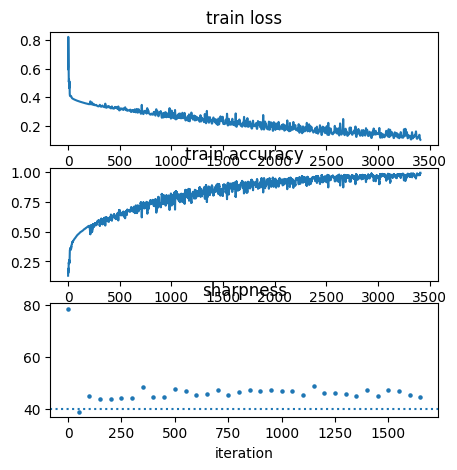

In [10]:
import torch
import matplotlib.pyplot as plt
from os import environ
import numpy as np

dataset = "cifar10-5k"
# arch = "fc-relu-depth1"
arch = "fc-tanh-depth1"
loss = "mse"
for i, lr in [(1, 0.05)]:
# for i, lr in enumerate(np.arange(0.01, 0.06, 0.01)):
# for i, lr in enumerate(np.arange(0.1, 0.2, 0.02)):
    # gd_lr = 0.01
    gd_lr = lr
    gd_eig_freq = 50

    gd_directory = f"../results/{dataset}/{arch}/seed_0/{loss}/gd/lr_{gd_lr}"

    gd_train_loss = torch.load(f"{gd_directory}/train_loss_final")
    gd_train_acc = torch.load(f"{gd_directory}/train_acc_final")
    gd_sharpness = torch.load(f"{gd_directory}/eigs_final")[:,0]

    plt.figure(figsize=(5, 5), dpi=100)

    plt.subplot(3, 1, 1)
    plt.plot(gd_train_loss)
    plt.title("train loss")

    plt.subplot(3, 1, 2)
    plt.plot(gd_train_acc)
    plt.title("train accuracy")

    plt.subplot(3, 1, 3)
    plt.scatter(torch.arange(len(gd_sharpness)) * gd_eig_freq, gd_sharpness, s=5)
    plt.axhline(2. / gd_lr, linestyle='dotted')
    plt.title("sharpness")
    plt.xlabel("iteration")